### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_initial = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

### EDA

In [3]:
df_initial.shape

(100000, 9)

In [4]:
df = df_initial.sample(n=1000, random_state=42)

In [5]:
df.shape

(1000, 9)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75721,Female,13.0,0,0,No Info,20.82,5.8,126,0
80184,Female,3.0,0,0,No Info,21.00,5.0,145,0
19864,Male,63.0,0,0,former,25.32,3.5,200,0
76699,Female,2.0,0,0,never,17.43,6.1,126,0
92991,Female,33.0,0,0,not current,40.08,6.2,200,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 75721 to 4151
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   object 
 1   age                  1000 non-null   float64
 2   hypertension         1000 non-null   int64  
 3   heart_disease        1000 non-null   int64  
 4   smoking_history      1000 non-null   object 
 5   bmi                  1000 non-null   float64
 6   HbA1c_level          1000 non-null   float64
 7   blood_glucose_level  1000 non-null   int64  
 8   diabetes             1000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 78.1+ KB


In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df['smoking_history'].unique()

array(['No Info', 'former', 'never', 'not current', 'current', 'ever'],
      dtype=object)

In [10]:
label_encoder = LabelEncoder()
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df['gender'] = label_encoder.fit_transform(df['gender'])

In [11]:
df['gender'].unique()

array([0, 1])

In [12]:
df['smoking_history'].unique()

array([0, 3, 4, 5, 1, 2])

In [13]:
df['age'] = df['age'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 75721 to 4151
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1000 non-null   int64  
 1   age                  1000 non-null   int64  
 2   hypertension         1000 non-null   int64  
 3   heart_disease        1000 non-null   int64  
 4   smoking_history      1000 non-null   int64  
 5   bmi                  1000 non-null   float64
 6   HbA1c_level          1000 non-null   float64
 7   blood_glucose_level  1000 non-null   int64  
 8   diabetes             1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

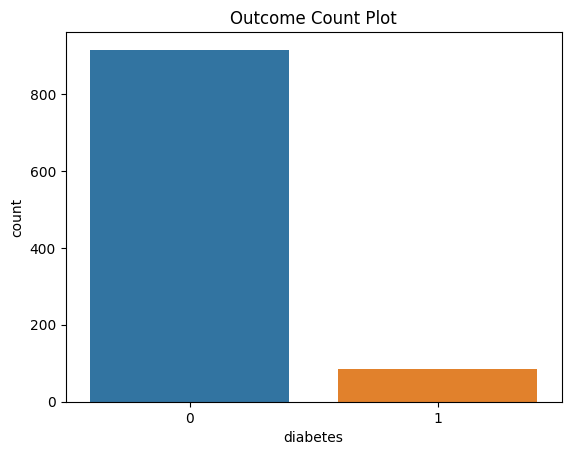

In [16]:
sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

In [17]:
y = df['diabetes']
X = df.drop(columns = ['diabetes'])

#### SMOTE (SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) - FOR BALANCE IN OUTCOMES

In [18]:
# Initial class distribution
print("Class distribution before SMOTE:")
print(y.value_counts())

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y).value_counts())

Class distribution before SMOTE:
diabetes
0    915
1     85
Name: count, dtype: int64

Class distribution after SMOTE:
diabetes
0    915
1    915
Name: count, dtype: int64


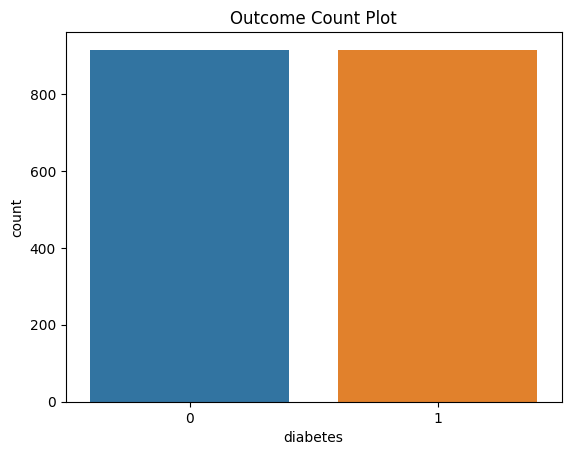

In [19]:
df = pd.concat([X, y], axis=1)

sns.countplot(x='diabetes', data=df)
plt.title('Outcome Count Plot')
plt.show()

### DATA VISUALISATION

#### CORRELATION MATRIX

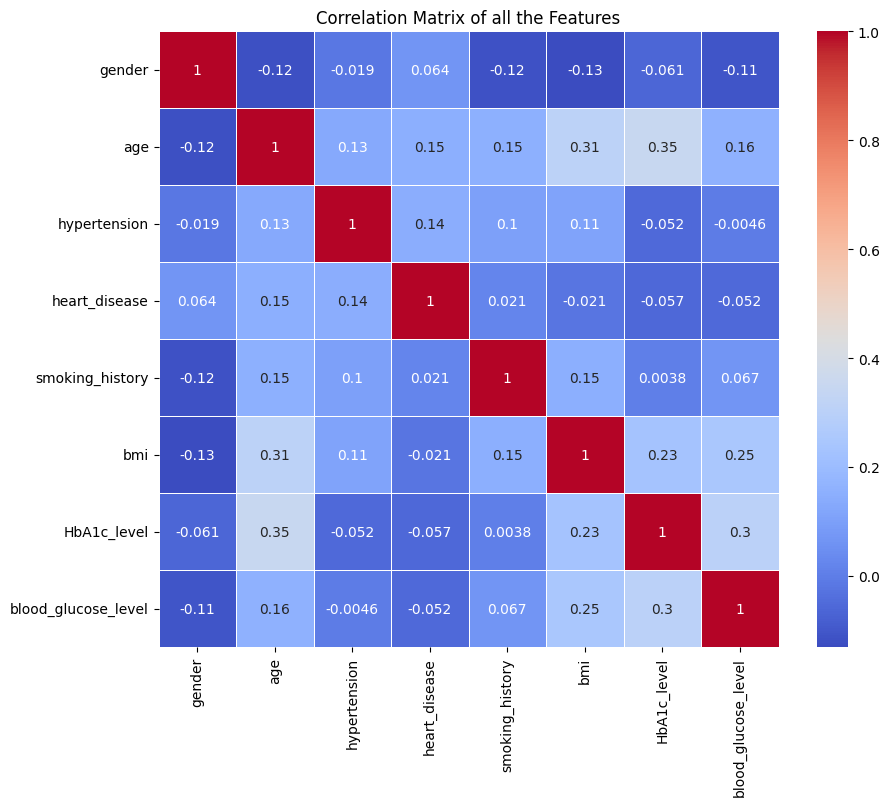

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of all the Features')
plt.show()

age_group
61-80     702
41-60     543
21-40     313
0-20      209
81-100     63
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


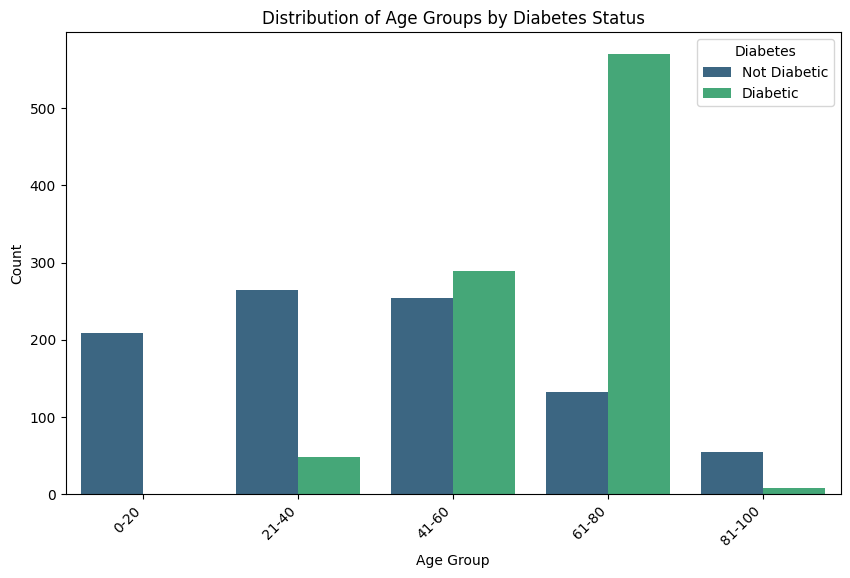

In [21]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
print(df['age_group'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='diabetes', data=df, order=age_labels, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups by Diabetes Status')
plt.legend(title='Diabetes', loc='upper right', labels=['Not Diabetic', 'Diabetic'])
plt.show()

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

### CROSS VALIDATION

#### USING CV TO DETERMINE IDEAL VALUE OF N_ESTIMATORS FOR SOME OF THE MODELS

- Random Forest

In [24]:
param_grid = {'n_estimators': [100, 200, 250, 300, 350, 400, 500]}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Grid Search Results:
Best Parameters: {'n_estimators': 250}
Best Cross-Validated Accuracy: 0.9748633879781421


- Ada Boost

In [25]:
param_grid = {'n_estimators': [100, 200, 250, 300, 350, 400, 500]}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Grid Search Results:
Best Parameters: {'n_estimators': 250}
Best Cross-Validated Accuracy: 0.9688524590163935


- Gradient Boosting

In [26]:
param_grid = {'n_estimators': [100, 200, 250, 300, 350, 400, 500]}
model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Grid Search Results:
Best Parameters: {'n_estimators': 300}
Best Cross-Validated Accuracy: 0.9754098360655737


#### USING CV TO DETERMINE NUMBER OF NEIGHBOURS IN KNN

In [27]:
param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11]}

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the results
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Grid Search Results:
Best Parameters: {'n_neighbors': 4}
Best Cross-Validated Accuracy: 0.9562841530054644


### COMPARING METRICS (ACCURACY, PRECISION, RECALL & F1 SCORE) OF THE VAROUS MODELS

In [28]:
# Define models
models = [
    RandomForestClassifier(n_estimators=250, random_state = 42),
    LogisticRegression(max_iter=1000, random_state = 42),
    SVC(random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    AdaBoostClassifier(n_estimators=250, random_state = 42),
    GradientBoostingClassifier(n_estimators=300, random_state = 42),
    KNeighborsClassifier(n_neighbors=4),
    GaussianNB()
]

# List of metric functions
metrics = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=1),
    'Recall': make_scorer(recall_score, pos_label=1),
    'F1 Score': make_scorer(f1_score, pos_label=1)
}


'''
# Loop through each model
for model in models:
    print(f'{model.__class__.__name__}:')

    # Loop through each metric
    for metric_name, metric_func in metrics.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=metric_func)

        # Print average metric scores for each model
        print(f'  Mean {metric_name}: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')
'''

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=metrics.keys(), columns=[model.__class__.__name__ for model in models])

# Loop through each model
for model in models:
    # Loop through each metric
    for metric_name, metric_func in metrics.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=metric_func)

        # Store mean and standard deviation of metric scores in the DataFrame
        results_df.at[metric_name, model.__class__.__name__] = f'{np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})'

# Display the results DataFrame
results_df

,RandomForestClassifier,LogisticRegression,SVC,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB
Accuracy,0.9749 (+/- 0.0176),0.9175 (+/- 0.0097),0.9470 (+/- 0.0197),0.9579 (+/- 0.0289),0.9689 (+/- 0.0247),0.9754 (+/- 0.0214),0.9563 (+/- 0.0201),0.9137 (+/- 0.0488)
Precision,0.9689 (+/- 0.0130),0.9073 (+/- 0.0081),0.9245 (+/- 0.0124),0.9635 (+/- 0.0085),0.9674 (+/- 0.0089),0.9729 (+/- 0.0113),0.9420 (+/- 0.0135),0.8829 (+/- 0.0466)
Recall,0.9814 (+/- 0.0345),0.9301 (+/- 0.0164),0.9738 (+/- 0.0420),0.9519 (+/- 0.0585),0.9705 (+/- 0.0509),0.9781 (+/- 0.0410),0.9727 (+/- 0.0386),0.9541 (+/- 0.0482)
F1 Score,0.9748 (+/- 0.0183),0.9185 (+/- 0.0100),0.9480 (+/- 0.0209),0.9567 (+/- 0.0317),0.9682 (+/- 0.0264),0.9751 (+/- 0.0224),0.9567 (+/- 0.0210),0.9171 (+/- 0.0468)


## GRADIENT BOOSTING CLASSIFIER

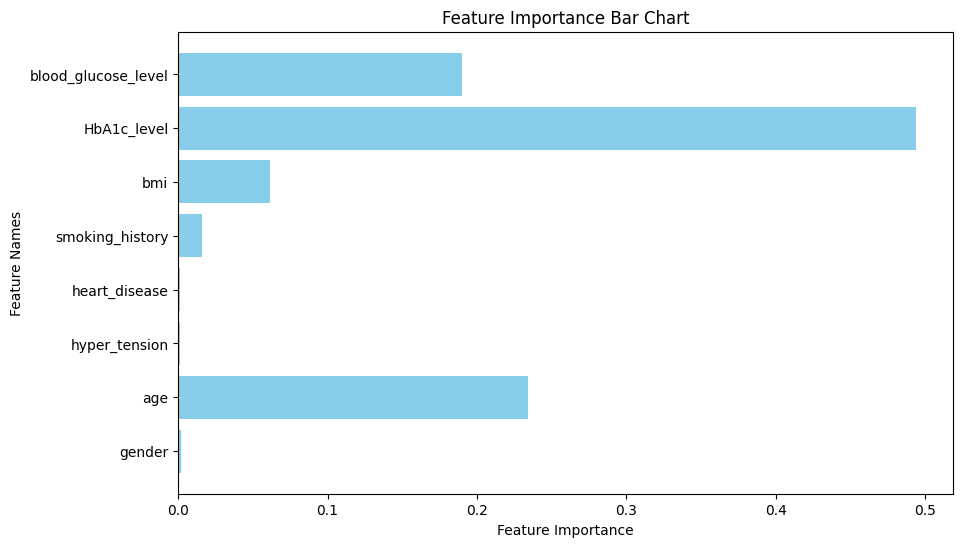

In [29]:
model = GradientBoostingClassifier(n_estimators=300, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
feature_names = ['gender', 'age', 'hyper_tension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

#### TRAIN TEST SPLIT

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = GradientBoostingClassifier(n_estimators=300, random_state=42, )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 96.99453551912568
Precision: 0.9489795918367347
Recall: 0.9946524064171123
F1 Score: 0.9712793733681462


#### CONFUSION MATRIX

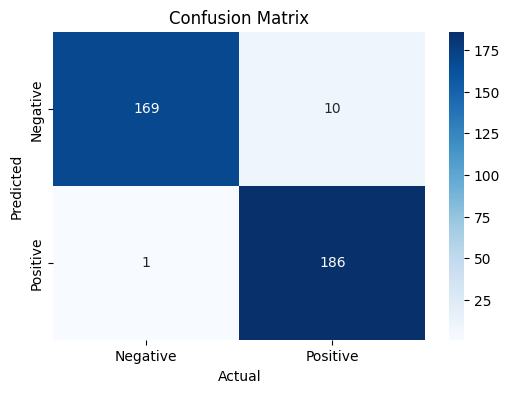

In [32]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## RANDOM FOREST CLASSIFIER

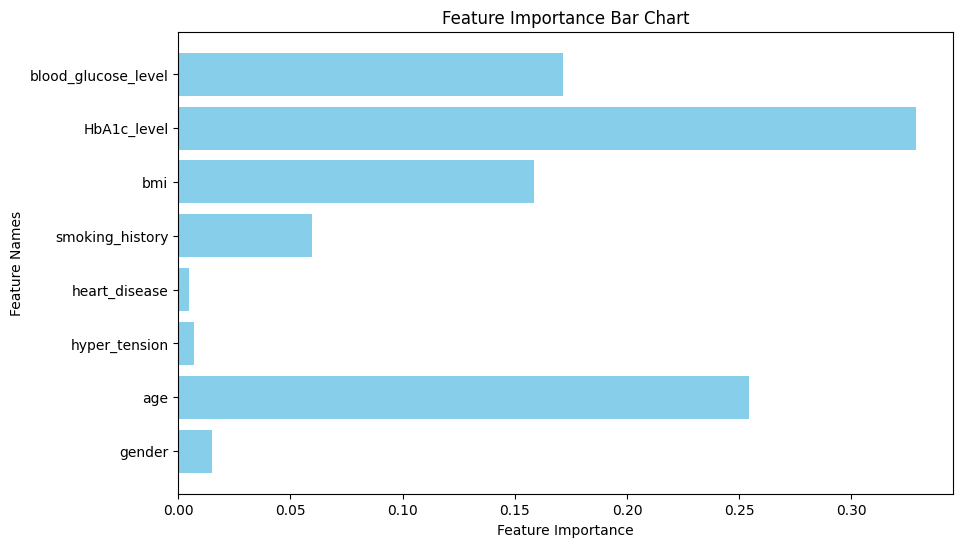

In [33]:
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
feature_names = ['gender', 'age', 'hyper_tension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Bar Chart')
plt.show()

#### TRAIN TEST SPLIT

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 96.17486338797814
Precision: 0.9390862944162437
Recall: 0.9893048128342246
F1 Score: 0.9635416666666667


#### CONFUSION MATRIX

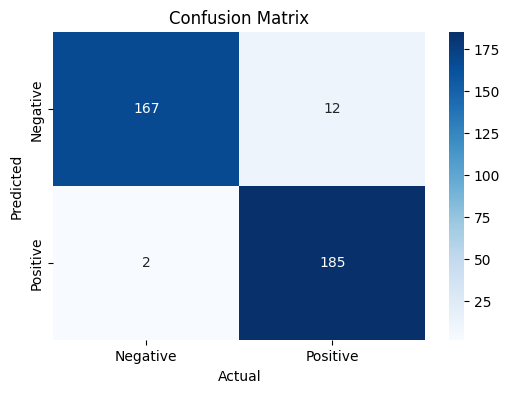

In [36]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## HYBRID MODELS

- Voting Classifier

In [37]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
random_forest = RandomForestClassifier(random_state=42, n_estimators=250)
gradient_boosting = GradientBoostingClassifier(random_state=42, n_estimators=300)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', random_forest),
    ('gb', gradient_boosting)
], voting='soft')  # Use 'hard' for majority voting, 'soft' for weighted voting

# Evaluate the Voting Classifier
cv_scores = cross_val_score(voting_classifier, X, y, cv=5, scoring='accuracy')
print(f'Voting Classifier: Mean Accuracy - {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')


Voting Classifier: Mean Accuracy - 0.9749 (+/- 0.0182)


Accuracy: 97.26775956284153
Precision: 0.9538461538461539
Recall: 0.9946524064171123
F1 Score: 0.9738219895287957


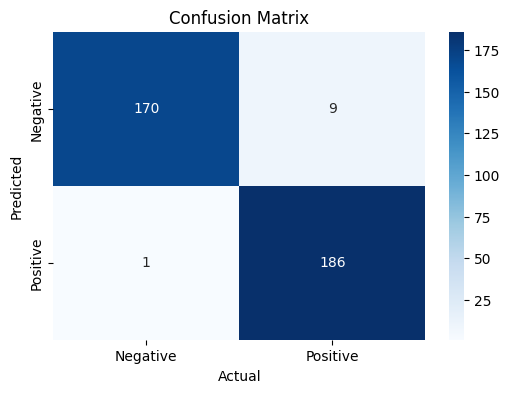

In [38]:
model = VotingClassifier(estimators=[
    ('rf', random_forest),
    ('gb', gradient_boosting)
], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


- Stacking Classifier

In [39]:
from sklearn.ensemble import StackingClassifier

# Initialize individual models
random_forest = RandomForestClassifier(random_state=42, n_estimators=250)
gradient_boosting = GradientBoostingClassifier(random_state=42, n_estimators=300)

# Create a Stacking Classifier
stacking_classifier = StackingClassifier(estimators=[
    ('rf', random_forest),
    ('gb', gradient_boosting)
], final_estimator=GradientBoostingClassifier(random_state=42))

# Evaluate the Stacking Classifier
cv_scores = cross_val_score(stacking_classifier, X, y, cv=5, scoring='accuracy')
print(f'Stacking Classifier: Mean Accuracy - {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')


Stacking Classifier: Mean Accuracy - 0.9689 (+/- 0.0230)


### METRICS OF ALL MODELS (USING CV)

##### METRICS:
- Accuracy: The proportion of correctly classified instances out of the total instances.
- Precision: The ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
- Recall (Sensitivity or True Positive Rate): The ratio of true positives to the sum of true positives and false negatives. It measures the model's ability to capture all relevant instances.
- F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

In [40]:
# Define models
models = [
    RandomForestClassifier(n_estimators=250, random_state = 42),
    LogisticRegression(max_iter=1000, random_state = 42),
    SVC(random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    AdaBoostClassifier(n_estimators=250, random_state = 42),
    GradientBoostingClassifier(n_estimators=300, random_state = 42),
    KNeighborsClassifier(n_neighbors=4),
    GaussianNB(),
    StackingClassifier(estimators=[('rf', random_forest),('gb', gradient_boosting)], final_estimator=GradientBoostingClassifier(random_state=42)),
    VotingClassifier(estimators=[('rf', random_forest),('gb', gradient_boosting)], voting='soft')
]

# List of metric functions
metrics = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=1),
    'Recall': make_scorer(recall_score, pos_label=1),
    'F1 Score': make_scorer(f1_score, pos_label=1)
}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=metrics.keys(), columns=[model.__class__.__name__ for model in models])

# Loop through each model
for model in models:
    # Loop through each metric
    for metric_name, metric_func in metrics.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=metric_func)

        # Store mean and standard deviation of metric scores in the DataFrame
        results_df.at[metric_name, model.__class__.__name__] = f'{np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})'

# Display the results DataFrame
results_df

,RandomForestClassifier,LogisticRegression,SVC,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB,StackingClassifier,VotingClassifier
Accuracy,0.9749 (+/- 0.0176),0.9175 (+/- 0.0097),0.9470 (+/- 0.0197),0.9579 (+/- 0.0289),0.9689 (+/- 0.0247),0.9754 (+/- 0.0214),0.9563 (+/- 0.0201),0.9137 (+/- 0.0488),0.9689 (+/- 0.0230),0.9749 (+/- 0.0182)
Precision,0.9689 (+/- 0.0130),0.9073 (+/- 0.0081),0.9245 (+/- 0.0124),0.9635 (+/- 0.0085),0.9674 (+/- 0.0089),0.9729 (+/- 0.0113),0.9420 (+/- 0.0135),0.8829 (+/- 0.0466),0.9708 (+/- 0.0090),0.9698 (+/- 0.0089)
Recall,0.9814 (+/- 0.0345),0.9301 (+/- 0.0164),0.9738 (+/- 0.0420),0.9519 (+/- 0.0585),0.9705 (+/- 0.0509),0.9781 (+/- 0.0410),0.9727 (+/- 0.0386),0.9541 (+/- 0.0482),0.9672 (+/- 0.0521),0.9803 (+/- 0.0367)
F1 Score,0.9748 (+/- 0.0183),0.9185 (+/- 0.0100),0.9480 (+/- 0.0209),0.9567 (+/- 0.0317),0.9682 (+/- 0.0264),0.9751 (+/- 0.0224),0.9567 (+/- 0.0210),0.9171 (+/- 0.0468),0.9681 (+/- 0.0250),0.9747 (+/- 0.0191)


### CONCLUSION:
#### MODEL WITH BEST PERFORMANCE: GRADIENT BOOSTING, CLOSELY FOLLOWED BY VOTING CLASSIFIER AND RANDOM FOREST.